<a href="https://colab.research.google.com/github/ngoan22mse23088/ArtificialIntelligence/blob/master/%5BAssignment_2%5D%20Get%20100%20numbers%20follow%20the%20rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
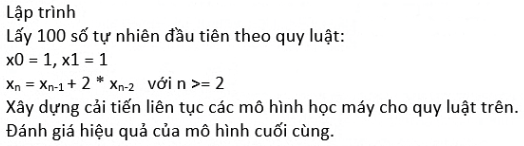

## Thêm thư viện cần thiết

In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

##  Lập trình qui luật và tạo dữ liệu




In [95]:
# Lập trình qui luật và tạo dữ liệu
def generate_sequence(n):
    sequence = [1, 1]
    for i in range(2, n):
        next_term = sequence[i - 1] + 2 * sequence[i - 2]
        sequence.append(next_term)
    return sequence

# Thử nghiệm với 100 số đầu tiên
# x0 = x1 = 1
# x2 = x1 + (2 * x0) = 1 + 2 = 3
# x3 = x2 + (2 * x1) = 3 + 2 = 5
# x4 = 11 ; x5 = 21 ; x6 = 43...

n = 100
sequence = generate_sequence(n)

# In ra mỗi dòng 1 giá trị kèm theo số thứ tự
for i, value in enumerate(sequence, start=1):
    print(f"x{i-1} = {value}")

x0 = 1
x1 = 1
x2 = 3
x3 = 5
x4 = 11
x5 = 21
x6 = 43
x7 = 85
x8 = 171
x9 = 341
x10 = 683
x11 = 1365
x12 = 2731
x13 = 5461
x14 = 10923
x15 = 21845
x16 = 43691
x17 = 87381
x18 = 174763
x19 = 349525
x20 = 699051
x21 = 1398101
x22 = 2796203
x23 = 5592405
x24 = 11184811
x25 = 22369621
x26 = 44739243
x27 = 89478485
x28 = 178956971
x29 = 357913941
x30 = 715827883
x31 = 1431655765
x32 = 2863311531
x33 = 5726623061
x34 = 11453246123
x35 = 22906492245
x36 = 45812984491
x37 = 91625968981
x38 = 183251937963
x39 = 366503875925
x40 = 733007751851
x41 = 1466015503701
x42 = 2932031007403
x43 = 5864062014805
x44 = 11728124029611
x45 = 23456248059221
x46 = 46912496118443
x47 = 93824992236885
x48 = 187649984473771
x49 = 375299968947541
x50 = 750599937895083
x51 = 1501199875790165
x52 = 3002399751580331
x53 = 6004799503160661
x54 = 12009599006321323
x55 = 24019198012642645
x56 = 48038396025285291
x57 = 96076792050570581
x58 = 192153584101141163
x59 = 384307168202282325
x60 = 768614336404564651
x61 = 153722

## Xây dựng mô hình học máy

###LinearRegression

In [96]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Lập trình qui luật và tạo dữ liệu
def generate_sequence(n):
    sequence = [1, 1]
    for i in range(2, n):
        next_term = sequence[i - 1] + 2 * sequence[i - 2]
        sequence.append(next_term)
    return sequence

# Thử nghiệm với 100 số đầu tiên
n = 100
sequence = generate_sequence(n)

# Chuẩn bị dữ liệu cho Linear Regression
X = np.array(range(1, n+1)).reshape(-1, 1)
y = np.array(sequence).reshape(-1, 1)

# Tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị cho số thứ 101
predicted_value_101 = model.predict(np.array([[101]]))

print("Dự đoán số thứ 101:", predicted_value_101[0][0])

Dự đoán số thứ 101: 3.3291833945387846e+28


###Mô hình LSTM

In [97]:
# Tạo dãy số theo qui luật
def generate_sequence(n):
    sequence = [1, 1]
    for i in range(2, n):
        next_term = sequence[i - 1] + 2 * sequence[i - 2]
        sequence.append(next_term)
    return sequence

n = 101
sequence = generate_sequence(n)

# Chuẩn bị dữ liệu huấn luyện
X = np.array(sequence[:-1]).reshape(-1, 1)
y = np.array(sequence[1:]).reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Reshape dữ liệu để phù hợp với đầu vào của LSTM
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
y_lstm = y_scaled.reshape(y_scaled.shape[0], 1, y_scaled.shape[1])

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_lstm, y_lstm, epochs=100, batch_size=8, verbose=1)

# Dự đoán số thứ 101 bằng mô hình đã huấn luyện
term_100 = np.array([sequence[100]]).reshape(-1, 1)
term_100_scaled = scaler.transform(term_100)
term_100_lstm = term_100_scaled.reshape(1, 1, 1)
predicted_term_101_scaled = model.predict(term_100_lstm)
predicted_term_101 = scaler.inverse_transform(predicted_term_101_scaled)

print("Dự đoán số thứ 101:", predicted_term_101)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.0132
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 13/100
13/13 [=================

### Mô hình Neural Network

In [98]:
# Tạo dãy số theo qui luật
def generate_sequence(n):
    sequence = [1, 1]
    for i in range(2, n):
        next_term = sequence[i - 1] + 2 * sequence[i - 2]
        sequence.append(next_term)
    return sequence

n = 101  # Đã thay đổi số lượng số trong dãy
sequence = generate_sequence(n)

# Chuẩn bị dữ liệu huấn luyện
X = np.array(sequence[:-1]).reshape(-1, 1)
y = np.array(sequence[1:]).reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Xây dựng mô hình Neural Network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

# Dự đoán số thứ 101 trong dãy
term_100 = np.array([sequence[100]]).reshape(-1, 1)
term_100_scaled = scaler.transform(term_100)
predicted_term_101_scaled = model.predict(term_100_scaled)
predicted_term_101 = scaler.inverse_transform(predicted_term_101_scaled)

print("Dự đoán số thứ 101:", predicted_term_101)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.0125
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 9.5061e-04
Epoch 13/100
10/10 [=============

## Giá trị thứ 101 theo qui luật

In [99]:
# Lập trình qui luật và tạo dữ liệu
def generate_sequence(n):
    sequence = [1, 1]
    for i in range(2, n):
        next_term = sequence[i - 1] + 2 * sequence[i - 2]
        sequence.append(next_term)
    return sequence

n = 101
sequence = generate_sequence(n)

# In ra mỗi dòng 1 giá trị kèm theo số thứ tự
for i, value in enumerate(sequence, start=1):
    print(f"x{i-1} = {value}")

x0 = 1
x1 = 1
x2 = 3
x3 = 5
x4 = 11
x5 = 21
x6 = 43
x7 = 85
x8 = 171
x9 = 341
x10 = 683
x11 = 1365
x12 = 2731
x13 = 5461
x14 = 10923
x15 = 21845
x16 = 43691
x17 = 87381
x18 = 174763
x19 = 349525
x20 = 699051
x21 = 1398101
x22 = 2796203
x23 = 5592405
x24 = 11184811
x25 = 22369621
x26 = 44739243
x27 = 89478485
x28 = 178956971
x29 = 357913941
x30 = 715827883
x31 = 1431655765
x32 = 2863311531
x33 = 5726623061
x34 = 11453246123
x35 = 22906492245
x36 = 45812984491
x37 = 91625968981
x38 = 183251937963
x39 = 366503875925
x40 = 733007751851
x41 = 1466015503701
x42 = 2932031007403
x43 = 5864062014805
x44 = 11728124029611
x45 = 23456248059221
x46 = 46912496118443
x47 = 93824992236885
x48 = 187649984473771
x49 = 375299968947541
x50 = 750599937895083
x51 = 1501199875790165
x52 = 3002399751580331
x53 = 6004799503160661
x54 = 12009599006321323
x55 = 24019198012642645
x56 = 48038396025285291
x57 = 96076792050570581
x58 = 192153584101141163
x59 = 384307168202282325
x60 = 768614336404564651
x61 = 153722

## Nhận xét


    Dự báo  	Quyluật 100   Quyluật 101   Linear_Regression   LSTM          Neural_Network
    Giá trị 	4.22e+29      8.45e+29	  3.32e+28            8.67e+29      8.44e+29

Với ví dụ trên, mô hình Linear Regression sẽ học cách ước tính số tiếp theo dựa trên số hiện tại. Tuy nhiên, trong trường hợp này, mô hình Linear Regression có thể không phải là lựa chọn tốt vì qui luật có tính chất không tuyến tính.

Để cải thiện mô hình, chúng ta có thể sử dụng các mô hình học máy phức tạp hơn như Decision Trees, Random Forests, Neural Networks, hoặc LSTM (Long Short-Term Memory) trong trường hợp này chúng ta thử mô hình dự đoán với LSTM và Neural Networks.

Chúng ta thấy rằng mô hình được cải tiến dần từ LR -> LSTM -> Neural Network. Giá trị gần đúng nhất là Neural Network (8.44e+29 so với 8.45e+29).

Lưu ý rằng dựa trên qui luật của chúng ta, dãy số sẽ tăng rất nhanh và có thể gây ra vấn đề về quy mô (scale) khi sử dụng một số mô hình.